In [64]:
%matplotlib inline
import pandas as pd
import numpy as np

import collections

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pymc3 as pm

import scipy.stats as stats

from matplotlib.patches import Ellipse
import numpy.random as rnd

In [106]:
a = 3.5        # average morning wait time
b = -1         # average difference afternoon wait time

sigma_a = 1    # std dev in intercepts
sigma_b = 0.5  # std dev in slopes

rho = -0.7     # correlation between intercepts and slopes

# Multivariate normal
Mu = np.array([a, b])

# variance-covariance matrix
Sigma = np.array([
        [sigma_a**2, sigma_a * sigma_b * rho], 
        [sigma_a * sigma_b * rho, sigma_b**2]
    ])

N_cafes = 20
seed = 5

vary_effects = stats.multivariate_normal.rvs(mean=Mu, cov=Sigma, size=N_cafes ,random_state=5)

a_cafe = vary_effects[:, 0]
b_cafe = vary_effects[:, 1]

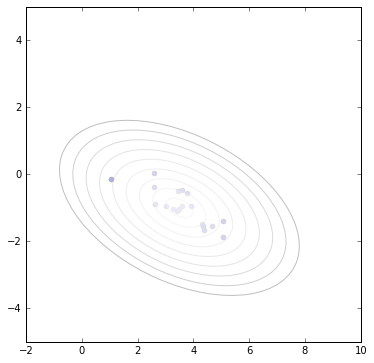

In [110]:
ells = [Ellipse(xy=(a, b), width=sigma_a * i, height=sigma_b * i, angle=340)
        for i in range(10)]

fig, ax = plt.subplots(1,1, figsize=(6, 6))

# fig = plt.figure(0)
# ax = fig.add_subplot(111, aspect='equal')

ax.scatter(a_cafe, b_cafe)

for e in ells:
    ax.add_artist(e)
#     e.set_clip_box(ax.bbox)
    e.set_alpha(0.25)
    e.set_facecolor((1, 1, 1))

ax.set_xlim(-2, 10)
ax.set_ylim(-5, 5)

plt.show()